In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
physicians = pd.read_csv('physicians.csv')
physicians.head()

,id,specialty
0,0,General Surgery
1,1,Unknown
2,2,Family Practice
3,3,Emergency Medicine
4,4,Plastic and Reconstructive Surgery


In [13]:
physicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36025 entries, 0 to 36024
Data columns (total 2 columns):
id           36025 non-null int64
specialty    36025 non-null object
dtypes: int64(1), object(1)
memory usage: 563.0+ KB


In [14]:
physicians['specialty'].value_counts().head(10)

Unknown                  11092
Cardiology                8274
Internal Medicine         2925
Family Practice           2197
Emergency Medicine        1084
Anesthesiology            1058
Diagnostic Radiology       929
Obstetrics/Gynecology      724
Psychiatry                 681
Orthopedic Surgery         655
Name: specialty, dtype: int64

In [15]:
procedures = pd.read_csv('procedures.csv')
procedures.head()

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16


In [16]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587774 entries, 0 to 587773
Data columns (total 4 columns):
physician_id          587774 non-null int64
procedure_code        587774 non-null object
procedure             587774 non-null object
number_of_patients    587774 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.9+ MB


In [17]:
physicians['specialty'].nunique()

71

In [18]:
procedures['physician_id'].nunique()

36025

In [19]:
physicians['id'].nunique()

36025

In [20]:
physproc = pd.merge(left=physicians,right=procedures,how='inner',left_on=['id'],right_on=['physician_id'])
physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [21]:
known_physproc = physproc[physproc['specialty'] != 'Unknown']
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [22]:
known_physproc['Cardiology'] = known_physproc['specialty'].apply(lambda s : 1 if s == 'Cardiology' else 0)

C:\Users\khiabaniy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients,Cardiology
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,0
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,0
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,0
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27,0
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16,0


In [24]:
unknown_physproc = physproc[physproc['specialty'] == 'Unknown']
unknown_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
7,1,Unknown,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14
164,11,Unknown,11,00142,anesthesia_for_lens_surgery,29
165,11,Unknown,11,00400,"anesthesia_for_procedure_on_skin_of_arms,_legs...",18
166,11,Unknown,11,00520,anesthesia_for_closed_procedure_in_chest,16
167,11,Unknown,11,00740,anesthesia_for_procedure_on_gastrointestinal_t...,14


In [25]:
unknown_physproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181063 entries, 7 to 587773
Data columns (total 6 columns):
id                    181063 non-null int64
specialty             181063 non-null object
physician_id          181063 non-null int64
procedure_code        181063 non-null object
procedure             181063 non-null object
number_of_patients    181063 non-null int64
dtypes: int64(3), object(3)
memory usage: 9.7+ MB


In [33]:
physproc_patients = known_physproc[['physician_id','Cardiology','number_of_patients']].groupby(['physician_id','Cardiology'])\
['number_of_patients'].sum().reset_index()
physproc_patients.head()

,physician_id,Cardiology,number_of_patients
0,0,0,109
1,2,0,89
2,3,0,437
3,4,0,33
4,5,1,1532


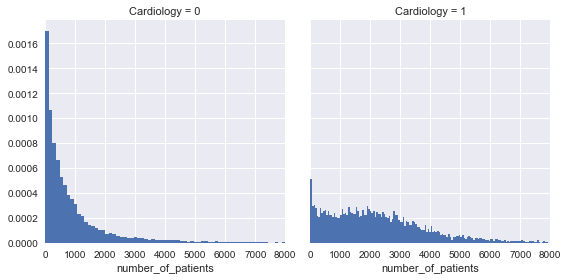

In [36]:
g = sns.FacetGrid(physproc_patients,col='Cardiology',size=4, aspect=1,xlim=(0,8000))
g.map(plt.hist,'number_of_patients',bins=500,normed=True)

In [38]:
physproc_patients.groupby(['Cardiology'])['number_of_patients'].describe()

Cardiology       
0           count    16659.000000
            mean       946.602617
            std       1483.394480
            min         11.000000
            25%        171.000000
            50%        487.000000
            75%       1126.500000
            max      58805.000000
1           count     8274.000000
            mean      2323.924462
            std       1837.959697
            min         11.000000
            25%        994.000000
            50%       2019.500000
            75%       3202.500000
            max      26028.000000
Name: number_of_patients, dtype: float64